# 数据来源
ref <https://github.com/fchollet/keras/blob/master/keras/datasets/mnist.py>
```
    f = np.load(path)
    x_train = f['x_train']
    y_train = f['y_train']
    x_test = f['x_test']
    y_test = f['y_test']
    f.close()
```

In [2]:
import numpy as np

f = np.load('./mnist.npz')
x_train = f['x_train']
y_train = f['y_train']
x_test = f['x_test']
y_test = f['y_test']

print(x_train[0][0])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


7 (28, 28)
784


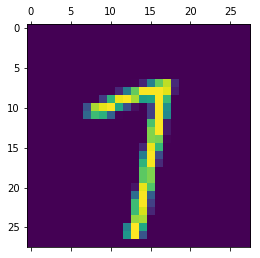

In [4]:
%matplotlib inline

import matplotlib.pyplot as plot

SAMPLE_INDEX= 42

sample_matrix = x_train[SAMPLE_INDEX]

plot.matshow(x_train[SAMPLE_INDEX])
print( y_train[SAMPLE_INDEX], sample_matrix.shape)

print( len( sample_matrix.flatten()))


In [8]:
# define the simpleset network

import torch
from torch.autograd import Variable


row = sample_matrix[0]

tx  = torch.Tensor([[1 if x>0 else 0 for x in sample_matrix.flatten()]])

def mnist2Var(sample):
    return Variable(torch.Tensor([[1 if x>0 else 0 for x in sample.flatten()]]),requires_grad=False)

def mnist2List(sample):
    return [1 if x>0 else 0 for x in sample.flatten()]


def toExpectVar(num):
    v = np.zeros([1,10])
    v[0][num]= 1
    return v




Variable containing:
 0.4485
[torch.FloatTensor of size 1]

5 Variable containing:
    0     1     0     0     0     0     0     0     0     0
[torch.ByteTensor of size 1x10]

0 Variable containing:
    1     0     0     0     0     0     0     0     0     0
[torch.ByteTensor of size 1x10]

4 Variable containing:
    0     0     0     0     1     0     0     0     0     0
[torch.ByteTensor of size 1x10]



In [11]:
softmax = torch.nn.functional.softmax
relu = torch.nn.functional.relu

w = Variable(torch.ones(784,10),requires_grad=True)   #784 x 10
b = Variable(torch.ones(1,10), requires_grad=True)


def h(x):
    return softmax( relu(x.mm(w) + b ))

ctriter = torch.nn.MSELoss()


batchSize=1

for r in range(1):
    for i in range(10):
        subX =[ mnist2List(data) for data in x_train[i*batchSize:(1+i)*batchSize]]
        
        subX = Variable(torch.Tensor(subX),requires_grad=False)
        subExpectY  = y_train[i*batchSize:(1+i)*batchSize]
        

        prey = h(subX)
        y = Variable(torch.zeros(1,10))
        subExpectY = [ toExpectVar(y) for y in subExpectY]
        subExpectY = Variable(torch.Tensor(subExpectY),requires_grad=True)
        loss = 0.5*(prey - subExpectY).pow(2).sum()
        
        loss.backward()

        w.data -= 0.000001*w.grad.data
        b.data -= 0.000001*b.grad.data

       
        w.grad.data.zero_()
        b.grad.data.zero_()


print( loss)

for i in range(3):
    index = i
    result =h(mnist2Var(x_train[index]))
    print (y_train[index], result==torch.max(result.data))

Variable containing:
 0.4500
[torch.FloatTensor of size 1]

5 Variable containing:
    0     0     0     1     0     1     0     0     0     0
[torch.ByteTensor of size 1x10]

0 Variable containing:
    1     0     0     0     0     0     0     0     0     0
[torch.ByteTensor of size 1x10]

4 Variable containing:
    0     0     0     0     1     0     0     0     0     0
[torch.ByteTensor of size 1x10]

